In [1]:
import pandas as pd
import numpy as np
listings = pd.read_csv('data/cleansed_listings.csv')
neighbourhoods = pd.read_csv('data/neighbourhoods.csv')
#calendar = pd.read_csv('data/calendar.csv')

## Set Price Category

In [2]:
price_cat = []
for row in range(len(listings['price'])):
    if listings['price'][row]<= 100 and 0<=listings['price'][row]:
        price_cat.append('$0-100')
    elif listings['price'][row]<=300 and 100<listings['price'][row]:
        price_cat.append('$100-300')
    elif listings['price'][row]<=1000 and 300<listings['price'][row]:
        price_cat.append('$300-1000')
    elif listings['price'][row]<=4000 and 1000<listings['price'][row]:
        price_cat.append('$1000-4000')
#print(price_cat)

In [3]:
listings['price'] = price_cat
# listings['price']

(0, 365)

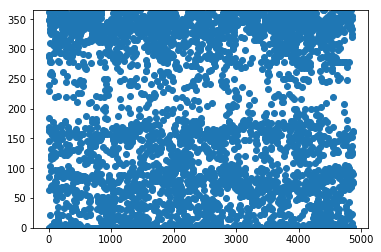

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(range(4866), listings['sum_of_nights'])
plt.ylim((0,365))

## Set sum_of_nights Category

In [5]:
sum_of_nights_cat = []
for row in range(len(listings['sum_of_nights'])):
    if listings['sum_of_nights'][row]<= 365 and 300<listings['sum_of_nights'][row]:
        sum_of_nights_cat.append(0)
    elif listings['sum_of_nights'][row]<=300 and 200<listings['sum_of_nights'][row]:
        sum_of_nights_cat.append(1)
    elif listings['sum_of_nights'][row]<=200 and 100<listings['sum_of_nights'][row]:
        sum_of_nights_cat.append(2)
    elif listings['sum_of_nights'][row]<=100 and 0<=listings['sum_of_nights'][row]:
        sum_of_nights_cat.append(3)
listings['sum_of_nights'] = sum_of_nights_cat

In [6]:
#listings['sum_of_nights'] = listings['sum_of_nights'].astype('float64') 

## Set host_response_time Category

In [7]:
listings['host_response_time'].value_counts()

within an hour        2574
within a few hours    1007
0                      788
within a day           454
a few days or more      43
Name: host_response_time, dtype: int64

In [8]:
host_response_time_cat = []
for row in range(len(listings['host_response_time'])):
    if 'within an hour' in listings['host_response_time'][row]:
        host_response_time_cat.append(1)
    elif 'within a few hours' in listings['host_response_time'][row]:
        host_response_time_cat.append(2)
    elif 'within a day' in listings['host_response_time'][row]:
        host_response_time_cat.append(3)
    elif 'a few days or more' in listings['host_response_time'][row]:
        host_response_time_cat.append(4)
    else:
        host_response_time_cat.append(0)
#print(host_response_time_cat)

In [9]:
listings['host_response_time'] = host_response_time_cat
#listings['host_response_time'] = listings['host_response_time'].astype('float64') 

## Set host_response_rate Category

In [10]:
listings['host_response_rate'] = listings['host_response_rate'].str.replace('%', '')
listings['host_response_rate'] = listings['host_response_rate'].astype('float64')/100 

(0, 1)

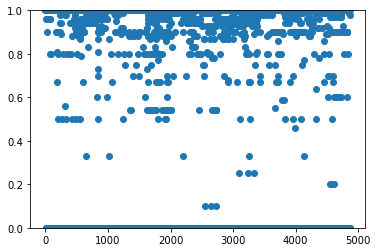

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(range(4866), listings['host_response_rate'])
plt.ylim((0,1))

In [12]:
responserate_cat = []
for row in range(len(listings['host_response_rate'])):
    if listings['host_response_rate'][row]<= 80 and 0<=listings['host_response_rate'][row]:
        responserate_cat.append(0)
    elif listings['host_response_rate'][row]<=90 and 80<listings['host_response_rate'][row]:
        responserate_cat.append(1)
    elif listings['host_response_rate'][row]<=100 and 90<listings['host_response_rate'][row]:
        responserate_cat.append(2)

In [13]:
obj = listings.select_dtypes(include=['object']).copy()
obj.head()

,listing_url,name,summary,space,description,neighborhood_overview,picture_url,street,neighbourhood_cleansed,city,is_location_exact,property_type,room_type,amenities,price,instant_bookable,cancellation_policy
0,https://www.airbnb.com/rooms/20872145,Charming Boston Residential,Berber carpeting. The living room has two full...,It's on the second floor.,Berber carpeting. The living room has two full...,Roslindale is an amazing up and coming town in...,https://a0.muscache.com/im/pictures/3cf36714-5...,"Boston, MA, United States",Roslindale,Boston,t,Apartment,Private room,"{""Wireless Internet"",Gym,Heating,""Smoke detect...",$0-100,t,moderate
1,https://www.airbnb.com/rooms/13937181,Guest Room in Cozy Home,"Guest room available in cozy, well-lit home on...",0,"Guest room available in cozy, well-lit home on...",0,https://a0.muscache.com/im/pictures/02f47ff6-c...,"Boston, MA, United States",Roslindale,Boston,t,House,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",$0-100,f,flexible
2,https://www.airbnb.com/rooms/3575220,The Artist room in beautiful villa.,"My home is a villa in one of the friendliest, ...",The room is spacious and private. The house is...,"My home is a villa in one of the friendliest, ...","This a nice multicultural, family neighborhood.",https://a0.muscache.com/im/pictures/45068406/a...,"Boston, MA, United States",Roslindale,Boston,t,House,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",$0-100,f,moderate
3,https://www.airbnb.com/rooms/17419858,Large Bedroom in WestRoxbury/Rozzie,Beautiful private room on a quiet street with ...,0,Beautiful private room on a quiet street with ...,Quiet quiet quiet it's close to everything yet...,https://a0.muscache.com/im/pictures/404ac642-9...,"Boston, MA, United States",Roslindale,Boston,t,Apartment,Private room,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$0-100,t,strict
4,https://www.airbnb.com/rooms/18202496,Bright and peaceful room in Roslindale Village,This is a spacious private room in a beautiful...,Perfect for couples or friends excited for day...,This is a spacious private room in a beautiful...,This is a fantastic area. Despite being a coll...,https://a0.muscache.com/im/pictures/878e31ee-f...,"Boston, MA, United States",Roslindale,Boston,t,House,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",$0-100,f,flexible


In [14]:
# city, street: boston - Boston, change to cap, change to the same
# label encoding: neighborhood_cleansed, property, cancellation
# delete picture url, listing url, neiborhood_overview, description, space
# name: one-hot encoding?
obj["room_type"].value_counts()
obj["instant_bookable"].value_counts()
obj["city"].value_counts()
obj["price"].value_counts()

$100-300      2617
$0-100        1760
$300-1000      478
$1000-4000      11
Name: price, dtype: int64

## Set Other Categories

In [15]:
# room_type: Entire home/apt: 0, Private room: 1, Shared room: 2
# instant_bookable: f: 0, t: 1
cleanup_nums = {"room_type":{"Entire home/apt": 0, "Private room": 1,
                            "Shared room": 2},
               "instant_bookable": {"f": 0, "t": 1},
                "price":{"$0-100":0, "$100-300":1, "$300-1000":2, "$1000-4000":3},
               "is_location_exact": {"f": 0, "t": 1}}
obj.replace(cleanup_nums, inplace=True)
obj.dtypes

listing_url               object
name                      object
summary                   object
space                     object
description               object
neighborhood_overview     object
picture_url               object
street                    object
neighbourhood_cleansed    object
city                      object
is_location_exact          int64
property_type             object
room_type                  int64
amenities                 object
price                      int64
instant_bookable           int64
cancellation_policy       object
dtype: object

In [16]:
obj["cancellation_policy"] = obj["cancellation_policy"].astype('category')
obj.dtypes
obj["cancellation_policy_cat"] = obj["cancellation_policy"].cat.codes
obj.dtypes

listing_url                  object
name                         object
summary                      object
space                        object
description                  object
neighborhood_overview        object
picture_url                  object
street                       object
neighbourhood_cleansed       object
city                         object
is_location_exact             int64
property_type                object
room_type                     int64
amenities                    object
price                         int64
instant_bookable              int64
cancellation_policy        category
cancellation_policy_cat        int8
dtype: object

In [17]:
obj["neighbourhood_cleansed"] = obj["neighbourhood_cleansed"].astype('category')
obj.dtypes
obj["neighbourhood_cleansed_cat"] = obj["neighbourhood_cleansed"].cat.codes
obj.dtypes

listing_url                     object
name                            object
summary                         object
space                           object
description                     object
neighborhood_overview           object
picture_url                     object
street                          object
neighbourhood_cleansed        category
city                            object
is_location_exact                int64
property_type                   object
room_type                        int64
amenities                       object
price                            int64
instant_bookable                 int64
cancellation_policy           category
cancellation_policy_cat           int8
neighbourhood_cleansed_cat        int8
dtype: object

In [18]:
obj["property_type"] = obj["property_type"].astype('category')
obj.dtypes
obj["property_type_cat"] = obj["property_type"].cat.codes
obj.dtypes

listing_url                     object
name                            object
summary                         object
space                           object
description                     object
neighborhood_overview           object
picture_url                     object
street                          object
neighbourhood_cleansed        category
city                            object
is_location_exact                int64
property_type                 category
room_type                        int64
amenities                       object
price                            int64
instant_bookable                 int64
cancellation_policy           category
cancellation_policy_cat           int8
neighbourhood_cleansed_cat        int8
property_type_cat                 int8
dtype: object

In [19]:
listings['property_type'] = obj["property_type_cat"]
listings['neighbourhood_cleansed'] = obj["neighbourhood_cleansed_cat"]
listings['cancellation_policy'] = obj["cancellation_policy_cat"]
listings['room_type'] = obj["room_type"]
listings['instant_bookable'] = obj["instant_bookable"]
listings['price'] = obj["price"]
listings['is_location_exact'] = obj["is_location_exact"]

In [20]:
df_i = listings.drop(['id','city', 'listing_url', 'picture_url', 'neighborhood_overview', 
                    'summary','space', 'description', 'street', 'name','1','2','3','4','5','6',
                   '7','8','9','10','11','12','amenities','latitude','longitude'], axis = 1)
df_i.dtypes

host_response_time          int64
host_response_rate        float64
neighbourhood_cleansed       int8
is_location_exact           int64
property_type                int8
room_type                   int64
accommodates                int64
bathrooms                 float64
bedrooms                  float64
beds                      float64
heating                     int64
wifi                        int64
pets_allowed                int64
Washer_dryer                int64
gym                         int64
sum_of_amenities            int64
price                       int64
instant_bookable            int64
cancellation_policy          int8
sum_of_nights               int64
dtype: object

## Split dataframe to features(X) & class(y)

In [21]:
df = df_i.drop(['price'], axis = 1)
X = df.values
y = df_i['price'].values
X.shape
y

array([0, 0, 0, ..., 1, 1, 0])

## Feature Engineering

### Elminate Unimportant Features

['host_response_time', 'host_response_rate', 'neighbourhood_cleansed', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'heating', 'wifi', 'pets_allowed', 'Washer_dryer', 'gym', 'sum_of_amenities', 'instant_bookable', 'cancellation_policy', 'sum_of_nights']
Feature ranking:
feature room_type (0.249011)
feature sum_of_amenities (0.102516)
feature neighbourhood_cleansed (0.100051)
feature accommodates (0.089039)
feature bedrooms (0.050088)
feature property_type (0.049069)
feature beds (0.047338)
feature bathrooms (0.045136)
feature sum_of_nights (0.043470)
feature host_response_rate (0.041122)
feature cancellation_policy (0.039219)
feature host_response_time (0.034384)
feature instant_bookable (0.021634)
feature gym (0.020756)
feature pets_allowed (0.018879)
feature Washer_dryer (0.017810)
feature is_location_exact (0.015552)
feature heating (0.007559)
feature wifi (0.007366)


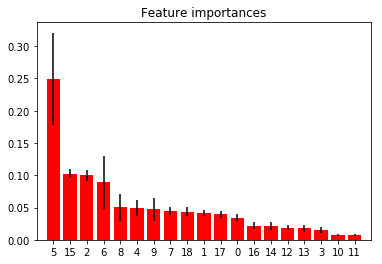

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
# print(importances)
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

col_header = list(df.columns.values)
print(col_header)
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("feature %s (%f)" % (col_header[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [23]:
df_final = df.drop(['wifi', 'heating', 'gym'], axis = 1)
X = df_final.values
df_final

,host_response_time,host_response_rate,neighbourhood_cleansed,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,pets_allowed,Washer_dryer,sum_of_amenities,instant_bookable,cancellation_policy,sum_of_nights
0,2,1.00,18,1,0,1,2,1.0,0.0,1.0,0,0,13,1,1,2
1,1,1.00,18,1,9,1,2,2.0,1.0,1.0,0,0,17,0,0,2
2,1,1.00,18,1,9,1,1,2.5,1.0,1.0,0,1,14,0,1,1
3,1,1.00,18,1,0,1,2,2.0,1.0,1.0,0,1,21,1,2,3
4,3,1.00,18,1,9,1,2,1.0,1.0,1.0,0,0,17,0,0,3
5,1,1.00,18,0,0,1,2,1.0,1.0,2.0,0,1,19,0,2,2
6,1,1.00,18,1,9,1,1,1.0,1.0,1.0,1,1,34,0,0,0
7,0,0.00,18,1,0,1,4,1.0,1.0,2.0,0,1,12,0,0,3
8,3,1.00,18,1,0,0,3,1.0,1.0,1.0,0,0,22,1,1,2
9,1,1.00,18,1,0,0,7,1.0,3.0,3.0,0,1,50,0,2,2


### One-Hot-Encoding

In [24]:
df_1hot = df_final.copy()
X_dummies = pd.get_dummies(df_1hot, columns=df_1hot.columns, drop_first=True) #one hot encoding
X_dummies

,host_response_time_1,host_response_time_2,host_response_time_3,host_response_time_4,host_response_rate_0.1,host_response_rate_0.2,host_response_rate_0.25,host_response_rate_0.33,host_response_rate_0.46,host_response_rate_0.5,...,sum_of_amenities_73,sum_of_amenities_78,instant_bookable_1,cancellation_policy_1,cancellation_policy_2,cancellation_policy_3,cancellation_policy_4,sum_of_nights_1,sum_of_nights_2,sum_of_nights_3
0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0,0,1,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


## Split dataset to X_train, X_test, y_train, y_test

In [25]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, random_state=0)

/Users/yiwenshen/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Start Machine Learning...

In [28]:
def report_results(grid):
    cv_keys = ('mean_test_score', 'std_test_score', 'params')
    print('mean_test_score +/ std_test_score, {params}') 
    for r, _ in enumerate(grid.cv_results_['mean_test_score']):
        bf = '*' if grid.cv_results_[cv_keys[0]][r]==grid.best_score_ else ' '
        print(bf+"%0.3f +/- %0.2f %r"
          % (grid.cv_results_[cv_keys[0]][r],
             grid.cv_results_[cv_keys[1]][r] / 2.0,
             grid.cv_results_[cv_keys[2]][r]))

### Random Forest

In [30]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=12, random_state=5)
#rf.fit(X_train, y_train)

params = {'max_depth': [4, 8, 12, 16], 'min_samples_leaf':[2, 4, 8]}

RFgrid = GridSearchCV(estimator=rf, param_grid=params, cv=5, scoring = 'accuracy')
RFgrid.fit(X_train,y_train)
report_results(RFgrid)

scores = cross_val_score(RFgrid, X_train, y_train, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

mean_test_score +/ std_test_score, {params}
 0.714 +/- 0.02 {'max_depth': 4, 'min_samples_leaf': 2}
 0.719 +/- 0.02 {'max_depth': 4, 'min_samples_leaf': 4}
 0.718 +/- 0.02 {'max_depth': 4, 'min_samples_leaf': 8}
 0.768 +/- 0.00 {'max_depth': 8, 'min_samples_leaf': 2}
 0.771 +/- 0.00 {'max_depth': 8, 'min_samples_leaf': 4}
 0.771 +/- 0.01 {'max_depth': 8, 'min_samples_leaf': 8}
 0.780 +/- 0.01 {'max_depth': 12, 'min_samples_leaf': 2}
 0.777 +/- 0.01 {'max_depth': 12, 'min_samples_leaf': 4}
 0.771 +/- 0.01 {'max_depth': 12, 'min_samples_leaf': 8}
*0.789 +/- 0.01 {'max_depth': 16, 'min_samples_leaf': 2}
 0.775 +/- 0.01 {'max_depth': 16, 'min_samples_leaf': 4}
 0.771 +/- 0.00 {'max_depth': 16, 'min_samples_leaf': 8}


/Users/yiwenshen/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


[ 0.81743869  0.77322404  0.81967213  0.80547945  0.80273973  0.78082192
  0.81043956  0.78021978  0.75824176  0.78236915]
0.793064620776


### Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(n_estimators=15, random_state=7)
#ab.fit(X_train, y_train)

params = {'n_estimators':[5, 10, 15, 20, 25]}

ABgrid = GridSearchCV(estimator=ab, param_grid=params, cv=5, scoring = 'accuracy')
ABgrid.fit(X_train,y_train)
report_results(ABgrid)

scores = cross_val_score(ABgrid, X_train, y_train, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

mean_test_score +/ std_test_score, {params}
*0.765 +/- 0.00 {'n_estimators': 5}
 0.751 +/- 0.02 {'n_estimators': 10}
 0.738 +/- 0.02 {'n_estimators': 15}
 0.740 +/- 0.02 {'n_estimators': 20}
 0.739 +/- 0.02 {'n_estimators': 25}


/Users/yiwenshen/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


[ 0.78201635  0.7568306   0.77868852  0.76712329  0.75890411  0.75068493
  0.78571429  0.76648352  0.74450549  0.76584022]
0.765679132031


### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=80, max_depth=4, min_samples_split=2)
gb.fit(X_train, y_train)

params = {'max_features': [0.3, 0.5, 1], 'max_depth': [2, 4, 6], 'min_samples_leaf':[2, 4]}
GBgrid = GridSearchCV(estimator=gb, param_grid=params, cv=5, scoring = 'accuracy')
GBgrid.fit(X_train, y_train)
report_results(GBgrid)

scores = cross_val_score(GBgrid, X_train, y_train, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

mean_test_score +/ std_test_score, {params}
 0.787 +/- 0.00 {'max_depth': 2, 'max_features': 0.3, 'min_samples_leaf': 2}
 0.789 +/- 0.01 {'max_depth': 2, 'max_features': 0.3, 'min_samples_leaf': 4}
 0.791 +/- 0.00 {'max_depth': 2, 'max_features': 0.5, 'min_samples_leaf': 2}
 0.791 +/- 0.00 {'max_depth': 2, 'max_features': 0.5, 'min_samples_leaf': 4}
 0.685 +/- 0.02 {'max_depth': 2, 'max_features': 1, 'min_samples_leaf': 2}
 0.675 +/- 0.02 {'max_depth': 2, 'max_features': 1, 'min_samples_leaf': 4}
 0.805 +/- 0.00 {'max_depth': 4, 'max_features': 0.3, 'min_samples_leaf': 2}
 0.801 +/- 0.01 {'max_depth': 4, 'max_features': 0.3, 'min_samples_leaf': 4}
 0.806 +/- 0.01 {'max_depth': 4, 'max_features': 0.5, 'min_samples_leaf': 2}
 0.799 +/- 0.01 {'max_depth': 4, 'max_features': 0.5, 'min_samples_leaf': 4}
 0.767 +/- 0.01 {'max_depth': 4, 'max_features': 1, 'min_samples_leaf': 2}
 0.734 +/- 0.02 {'max_depth': 4, 'max_features': 1, 'min_samples_leaf': 4}
 0.808 +/- 0.01 {'max_depth': 6, 'max_fe

/Users/yiwenshen/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


### MultinomialNB

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.cross_validation import cross_val_score
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
scores = cross_val_score(mnb, X_train, y_train, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

### Ensemble Method

In [ ]:
from sklearn.ensemble import VotingClassifier
clf = VotingClassifier(estimators=[('RF', RFgrid), ('AB', ABgrid), ('GB', GBgrid), ('MNB', mnb)],
                        voting='soft')
clf.fit(X_train,y_train)
ac = cross_val_score(clf, X_train, y_train, cv=5, scoring = 'accuracy')
print('mean_test_score = ', ac.mean())
print('std_test_score = ', ac.std())

### Linear Regression Model 

In [ ]:
X_2 = listings[listings.columns[[33,34,35,36,37,38,39,40,41,42,43,44]]].values
y_2 = listings['price'].values
listings.dtypes

In [ ]:
from sklearn.cross_validation import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2, y_2, random_state=0)

X_test2.shape
y_test2.shape


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn import datasets, linear_model, cross_validation
import pandas as pd
from sklearn.metrics import accuracy_score

# Create linear regression object
loo = cross_validation.LeaveOneOut(len(y_train2)) 
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train2, y_train2)

# y_pred2 = regr.predict(X_test2)

#accuracy_score(y_test2, y_pred2.round(), normalize = False)
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(regr, X_train2, y_train2, cv=loo, scoring='neg_mean_squared_error')
print(max(scores))

In [ ]:
print(scores.mean())

In [ ]:
from sklearn.linear_model import Ridge
ridge = linear_model.Ridge()
scores = cross_val_score(ridge, X_train2, y_train2, cv=loo, scoring='neg_mean_squared_error')
print(max(scores))

In [ ]:
from sklearn.linear_model import Lasso
lasso = linear_model.Lasso()
scores = cross_val_score(lasso, X_train2, y_train2, cv=loo, scoring='neg_mean_squared_error')
print(max(scores))

In [ ]:
from sklearn.linear_model import BayesianRidge
br = linear_model.BayesianRidge()
scores = cross_val_score(br, X_train2, y_train2, cv=loo, scoring='neg_mean_squared_error')
print(max(scores))

In [ ]:
# from sklearn.ensemble import VotingClassifier
# clf = VotingClassifier(estimators = [('dt', DTgrid.best_estimator_),
#                                      ('random forest', RFgrid.best_estimator_),
#                                      ('bagging', BCgrid.best_estimator_),
#                                      ('Ada', ABgrid.best_estimator_),
#                                      ('Gradient', GBgrid.best_estimator_)], 
#                        voting = 'soft', weights = [1,1,1,1,1])
# clf.fit(X,y)